# Logo control on VCS canvas<a id="top"></a> 

- [Download Jupyter Notebook ipynb](./Logo_Control.ipynb)
- You can trun on/off showing the default UV-CDAT logo, which is originally located at bottom right.
- You can add additional logo.

<div align="right">
Tutorial written by Jiwoo Lee (Sep. 2017)
</div>

# Contents
([top](#top))
- [Prepare a sample plot](#sample_plot)
- [Trun OFF the default UV-CDAT logo](#turn_off)
- [Trun ON the default UV-CDAT logo](#turn_on)
- [Insert additional logo](#add_logo)
- [Control logo location](#loc_logo)
- [Control logo size](#size_logo)
- [Hide unwanted information above the plot](#hide_info)

# Prepare a sample plot<a id="sample_plot"></a> 
([top](#top))

Let's prepare a sample VCS plot to test logo control. 

In [1]:
# Sample data
import requests
r = requests.get("https://cdat.llnl.gov/cdat/sample_data/clt.nc",stream=True)
with open("clt.nc","wb") as f:
    for chunk in r.iter_content(chunk_size=1024):
        if chunk:  # filter local_filename keep-alive new chunks
            f.write(chunk)

/Users/doutriaux1/anaconda2/envs/cdat/lib/python2.7/site-packages/vtk/util/numpy_support.py:135: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


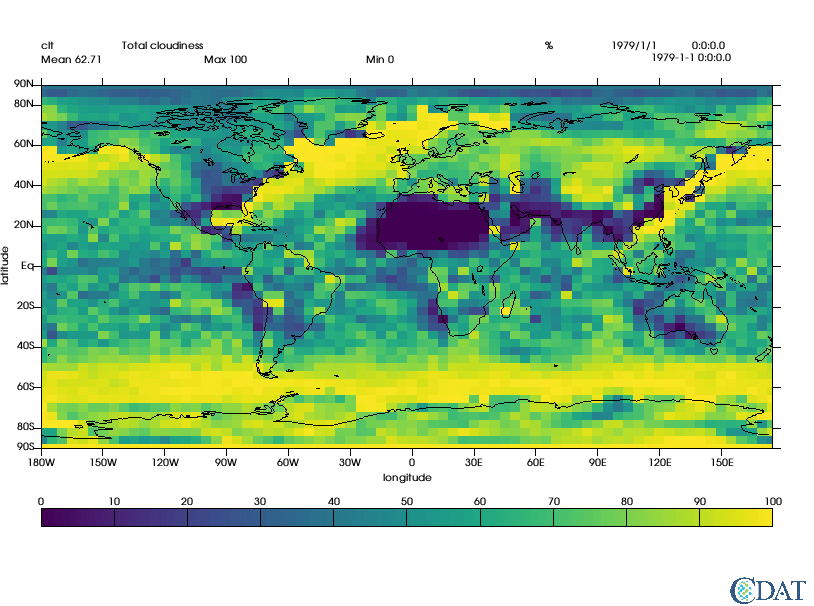

In [2]:
import cdms2, vcs
f = cdms2.open('clt.nc')
d = f('clt')
x = vcs.init()
x.plot(d)

# Trun OFF the default UV-CDAT logo<a id="turn_off"></a> 
([top](#top))
- You can hide the default UV-CDAT logo, which is originally located at bottom right.
- Use "drawlogooff"

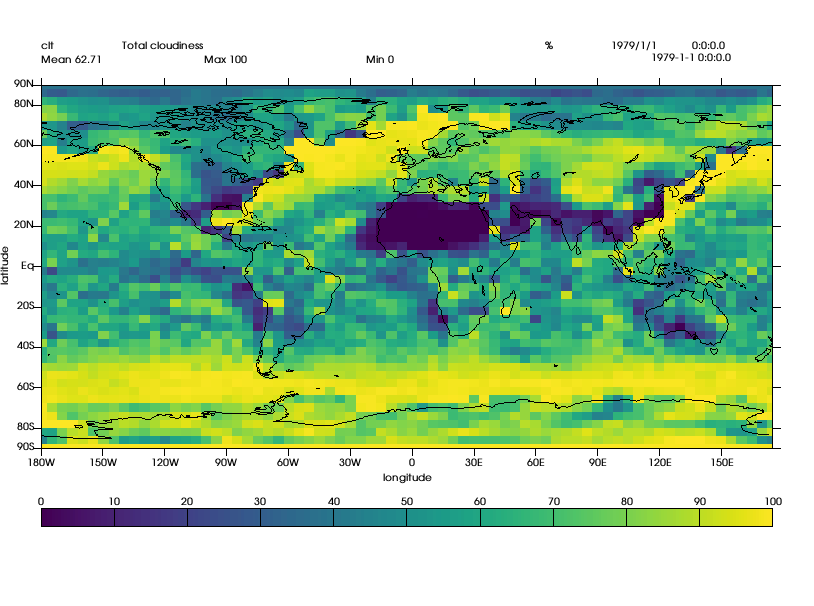

In [3]:
x.drawlogooff()
x.clear()
x.plot(d)

# Turn ON the default UV-CDAT logo<a id="turn_on"></a> 
([top](#top))
- You can bring back the default UV-CDAT logo, which is originally located at bottom right.
- Use "drawlogoon"

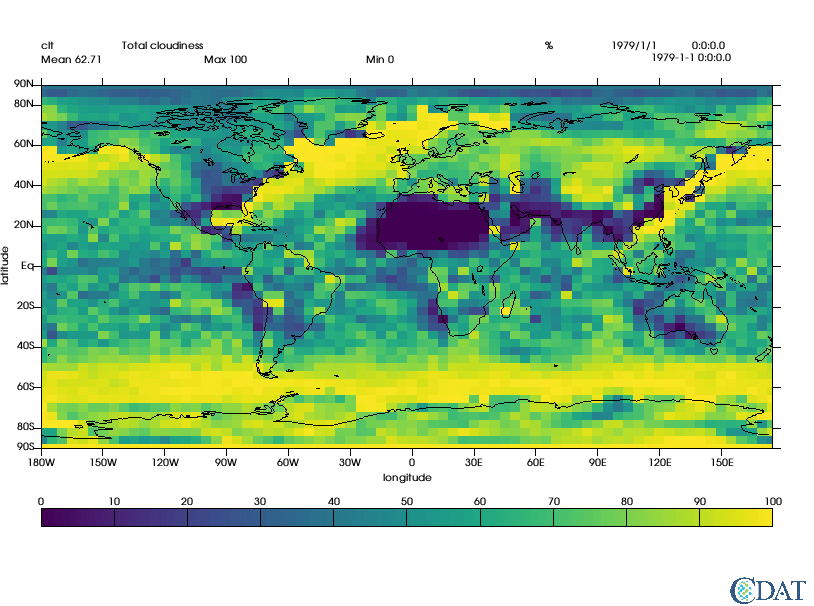

In [4]:
x.drawlogoon()
x.clear()
x.plot(d)

# Insert additional logo<a id="add_logo"></a> 
([top](#top))


- Prepare image file of logo you want to add to your directory.
- "vcs.utils.Logo" allows you to have additional logo.
- Default location of new logo is top right.

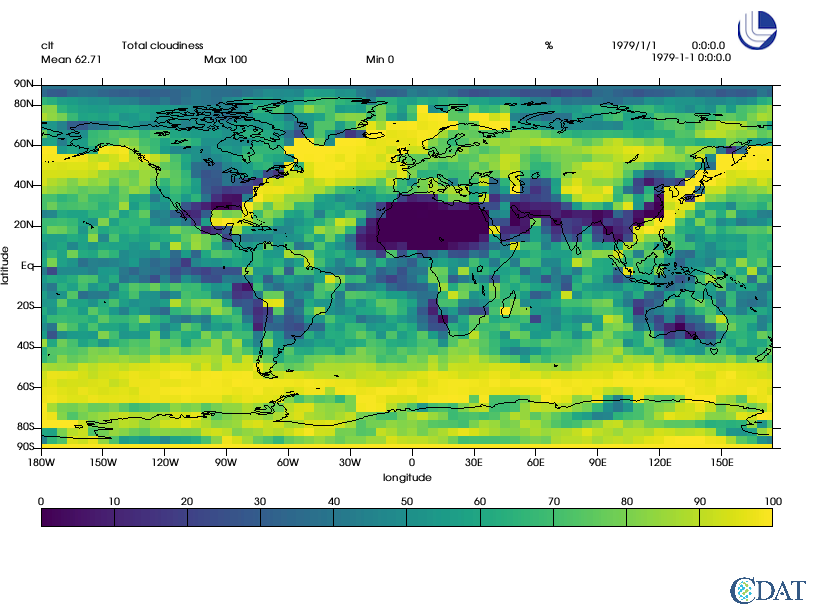

In [5]:
x.clear()
logo2 = vcs.utils.Logo('./logo.png')
logo2.plot(x)
x.plot(d)

# Control logo location<a id="loc_logo"></a> 
([top](#top))
- You can adjust position of the logo by using ".x" and ".y" 
- Given number should be in range of 0 to 1. It is ratio, relative position on canvas.

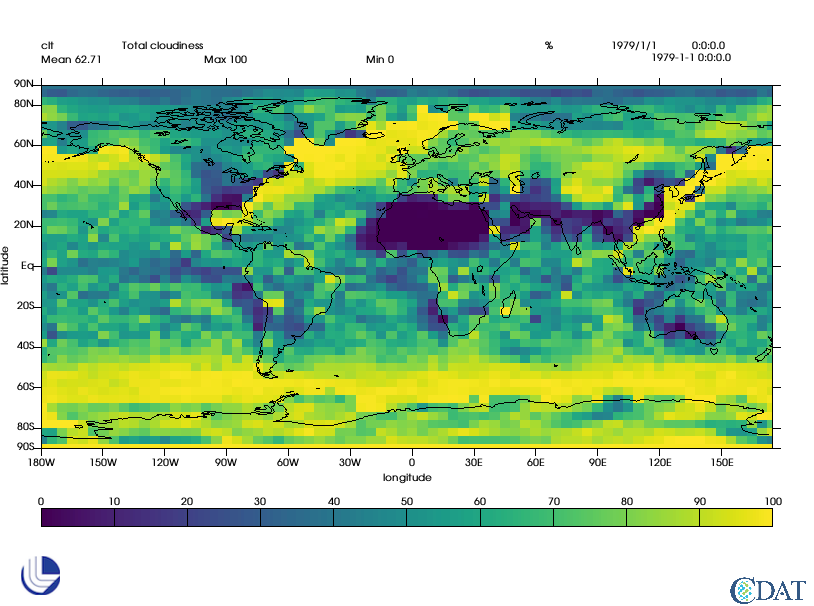

In [6]:
x.clear()
logo2 = vcs.utils.Logo('./logo.png')
logo2.x = .05
logo2.y = .05
logo2.plot(x)
x.plot(d)

# Control logo size<a id="size_logo"></a> 
([top](#top))
- You can adjust size of the logo by using ".source_width" and ".source_height" 
- Below example increases logo size by 3 times.

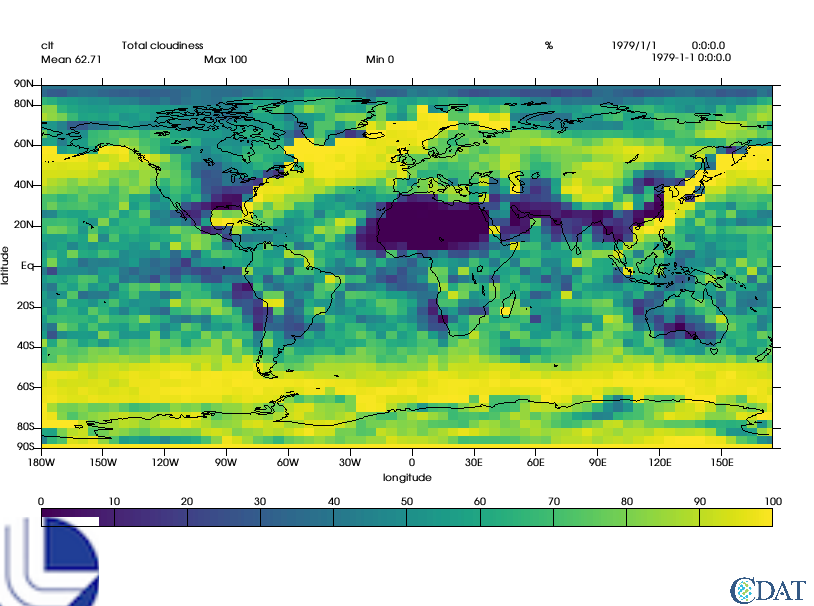

In [7]:
x.clear()
logo2 = vcs.utils.Logo('./logo.png')
logo2.x = .05
logo2.y = .05
logo2.width = logo2.source_width * 3
logo2.height = logo2.source_height * 3
logo2.plot(x)
x.plot(d)

- Below example reduces logo size to half.

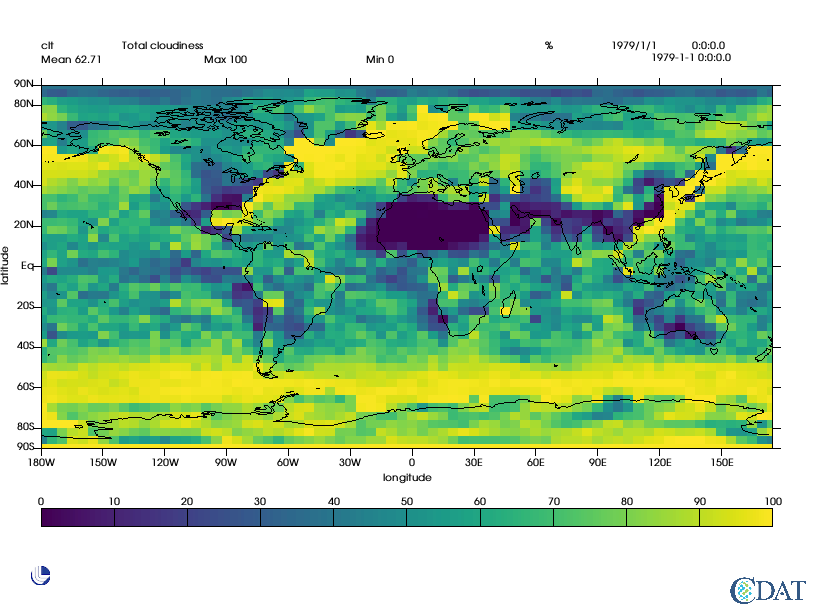

In [8]:
x.clear()
logo2 = vcs.utils.Logo('./logo.png')
logo2.x = .05
logo2.y = .05
logo2.width = logo2.source_width * .5
logo2.height = logo2.source_height * .5
logo2.plot(x)
x.plot(d)

# Hide unwanted information above the plot<a id='hide_info'></a>
([top](#top))
- If your new logo is conflict with text information above the plot, you can hide unwanted items.
- Below, some of text are overlapped with the new logo.

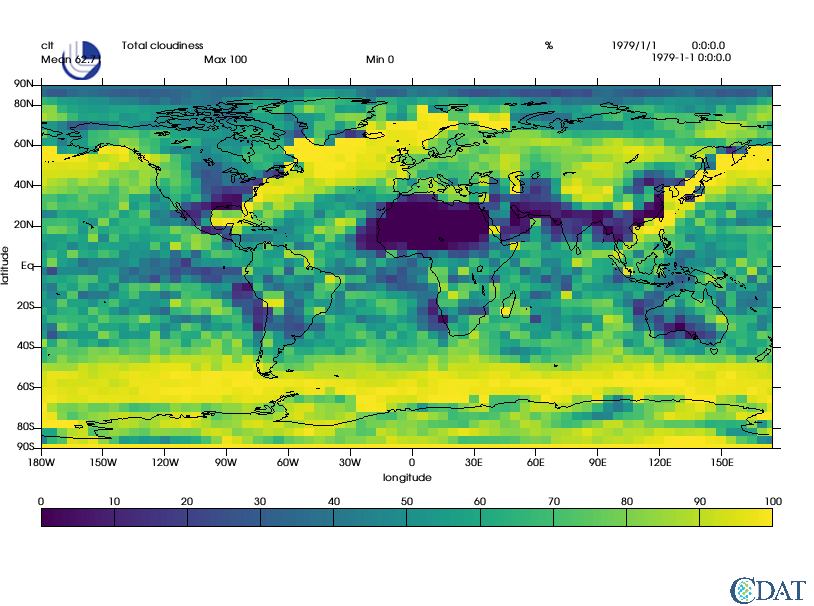

In [9]:
x.clear()
logo2 = vcs.utils.Logo('./logo.png')
logo2.x = .1
logo2.y = .9
logo2.plot(x)
x.plot(d)

- Let's hide those text above the plot.

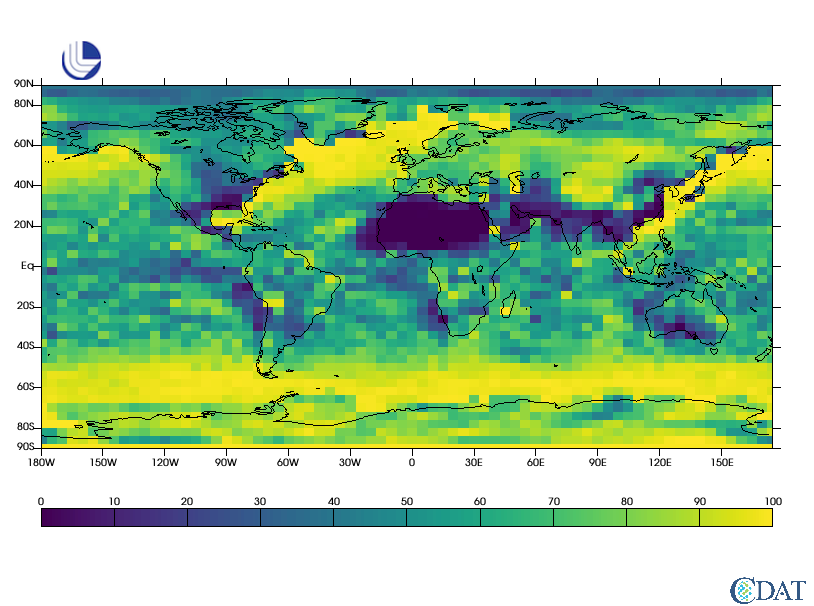

In [10]:
my_template = vcs.createtemplate()
# Turn off no-needed information -- prevent overlap
my_template.blank(['title','dataname','crdate','crtime','mean','min','max',
           'units','zvalue','tvalue','xunits','yunits','xname','yname'])
x.clear()
logo2.plot(x)
x.plot(d,my_template)

- To identify text you want to hide, please see below.

![controllable_parameters](https://user-images.githubusercontent.com/2781425/29979739-8f2acb66-8efb-11e7-8d34-0cb769194dfc.jpg)